1
5.830656931657144
5.830656931657144
nan
2
6.657432067235716
6.24404449944643
nan


C:\Users\TARAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\TARAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


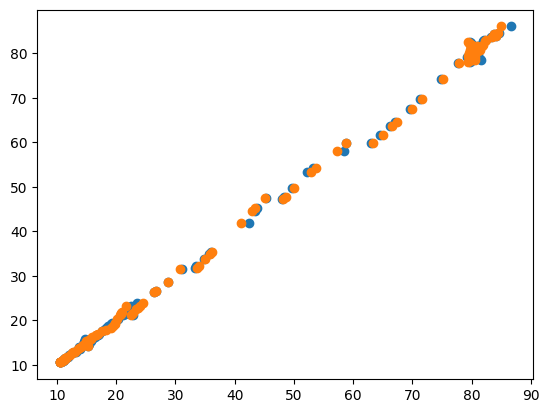

In [35]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

class ELM:
    def __init__(self,n_h_neurons,ac = "sigmoid"):
        self.n_h_neurons = n_h_neurons
        self.ac = ac

    def act(self,x):
        if self.ac == "sigmoid":
            return (1/(1+np.exp(-x)))
        elif self.ac == "tanh":
            return np.tanh(x)
        elif self.ac == "relu":
            return np.maximum(0,x)
        else:
            raise ValueError("Unsupported activation function")

    def fit(self, X,y):
        self.i_w = np.random.randn(X.shape[1], self.n_h_neurons)
        self.biases = np.random.randn(self.n_h_neurons)
        H = self.act(np.dot(X, self.i_w)+self.biases)
        self.o_w = np.dot(np.linalg.pinv(H),y)


    def predict(self,X):
        H = self.act(np.dot(X, self.i_w)+self.biases)
        return np.dot(H, self.o_w)


if __name__ == "__main__":
    df = pd.read_csv("output_29.csv")
    ds = df.values
    X = ds[:,0:5]
    Y = ds[:,5]
    y = np.array(Y)
    y = y.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
    k = 2
    kf = KFold(n_splits = k, shuffle = True, random_state = 42)
    mae_per_fold = []
    for fold,(train_index,val_index) in enumerate(kf.split(X_train)):
        print(fold+1)
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index],y_train[val_index]
        

        elm = ELM(n_h_neurons = 100, ac = "relu")
        elm.fit(X_train,y_train)
        y_pred = elm.predict(X_test)
        predictions = np.argmax(elm.predict(X_val_fold),axis = 1)
        mae = mean_absolute_error(y_val_fold,predictions)

        mae_per_fold.append(mae)
        print(mae)
        avg_mae = np.mean(mae_per_fold)
        print(avg_mae)
    
        test = scaler.inverse_transform(y_test).reshape(1,-1)
        predictions = scaler.inverse_transform(y_pred).reshape(1,-1)
        r2 = r2_score(predictions,test)
        print(r2)
        plt.scatter(predictions,test)

In [36]:
from sklearn import ELMRegressor

ImportError: cannot import name 'ELMRegressor' from 'sklearn' (C:\Users\TARAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\__init__.py)

In [41]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import hpelm

 df = pd.read_csv("output_29.csv")
    ds = df.values
    X = ds[:,0:5]
    Y = ds[:,5]
    y = np.array(Y)
    y = y.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
    mae_per_fold = []
    for fold,(train_index,val_index) in enumerate(kf.split(X_train)):
        print(fold+1)
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index],y_train[val_index]
        

        elm = ELM(n_h_neurons = 100, ac = "relu")
        elm.fit(X_train,y_train)
        y_pred = elm.predict(X_test)
        predictions = np.argmax(elm.predict(X_val_fold),axis = 1)
        mae = mean_absolute_error(y_val_fold,predictions)

        mae_per_fold.append(mae)
        print(mae)
        avg_mae = np.mean(mae_per_fold)
        print(avg_mae)
    

Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons
0.9936032819843778


Text(0, 0.5, 'Test values')

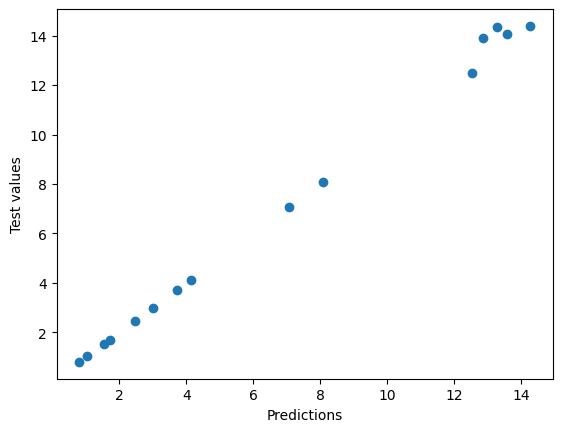

In [41]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from hpelm import ELM

df = pd.read_csv("output_31.csv")
ds = df.values
X = ds[:,0:5]
Y = ds[:,5]
y = np.array(Y)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
elm = ELM(X_train.shape[1],y_train.shape[1])
elm.add_neurons(300,"sigm")
elm.train(X_train,y_train,'l',C = 0.01)
y_pred = elm.predict(X_test)
r2 = r2_score(y_pred,y_test)
print(r2)
plt.scatter(y_pred,y_test)
plt.xlabel("Predictions")
plt.ylabel("Test values")

Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons
0.9966968132274411


Text(0, 0.5, 'Test values')

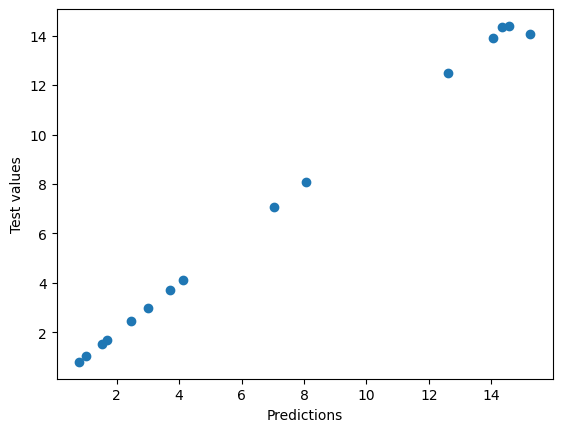

In [42]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from hpelm import ELM

df = pd.read_csv("output_31.csv")
ds = df.values
X = ds[:,0:5]
Y = ds[:,5]
y = np.array(Y)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
elm = ELM(X_train.shape[1],y_train.shape[1])
elm.add_neurons(200,"sigm")
elm.train(X_train,y_train,'l',C = 0.01)
y_pred = elm.predict(X_test)
r2 = r2_score(y_pred,y_test)
print(r2)
plt.scatter(y_pred,y_test)
plt.xlabel("Predictions")
plt.ylabel("Test values")

Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons
0.9155612741332737


Text(0, 0.5, 'Test values')

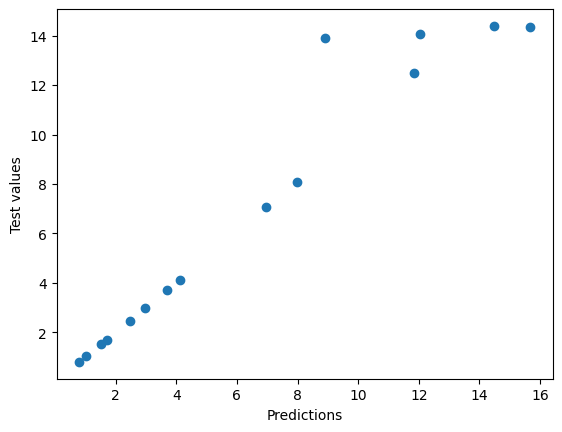

In [44]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from hpelm import ELM

df = pd.read_csv("output_31.csv")
ds = df.values
X = ds[:,0:5]
Y = ds[:,5]
y = np.array(Y)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
elm = ELM(X_train.shape[1],y_train.shape[1])
elm.add_neurons(100,"sigm")
elm.train(X_train,y_train,'l',C = 0.01)
y_pred = elm.predict(X_test)
r2 = r2_score(y_pred,y_test)
print(r2)
plt.scatter(y_pred,y_test)
plt.xlabel("Predictions")
plt.ylabel("Test values")